<a href="https://colab.research.google.com/github/gawayne29/gawayneLessons/blob/main/week2/YINandSpectralFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YIN algorithm, implemented in Aubio: https://aubio.org/

In [8]:
import matplotlib.pyplot as plt
import numpy as np
!pip install aubio
import aubio

import librosa
import librosa.display
import pandas

!git clone https://github.com/jcdevaney/gawayneLessons.git

fatal: destination path 'gawayneLessons' already exists and is not an empty directory.


In [28]:
# YIN pitches
filename='/content/gawayneLessons/files/Michael - Jackson Earth Song - TRIM.wav'
downsample = 1
samplerate = 0
win_s = 1764 // downsample # fft size
hop_s = 441 // downsample # hop size
s = aubio.source(filename, samplerate, hop_s)
samplerate = s.samplerate
tolerance = 0.1

pitch_o = aubio.pitch("yin", win_s, hop_s, samplerate)
#pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitchesYIN = []
confidences = []
total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    pitch = int(round(pitch))
    confidence = pitch_o.get_confidence()
    pitchesYIN += [pitch]
    confidences += [confidence]
    total_frames += read
    if read < hop_s:
         break

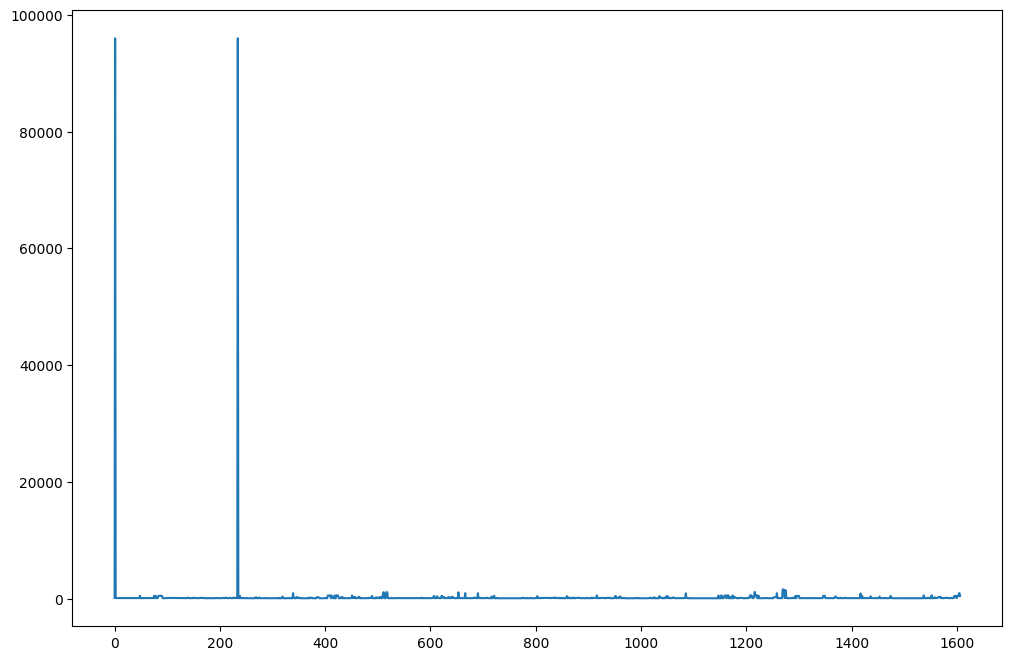

In [29]:


plt.figure(figsize=(12, 8))
plt.subplot(1,1,1)
plt.plot(np.asarray(pitchesYIN))


## Some notes on the functions

### Function 1
yinvalues = getYinVals(filename)

### Function 2
subplotFunc(yinvalues,subplotNum,additionalargs)

Calls:
plt.subplot(1,1,subplotNume) and plt.plot(np.asarray(yinvalues))

### How you'll call the functions

yinvalues1 = getYinVals(filename1)
yinvalues2 = getYinVals(filename2)
yinvalues3 = getYinVals(filename3)
yinvalues4 = getYinVals(filename4)
yinvalues5 = getYinVals(filename5)
yinvalues6 = getYinVals(filename6)

plt.figure(figsize=(12, 8))

subplotFunc(yinvalues1,1,additionalargs)
subplotFunc(yinvalues2,2,additionalargs)
subplotFunc(yinvalues3,3,additionalargs)
subplotFunc(yinvalues4,4,additionalargs)
subplotFunc(yinvalues5,5,additionalargs)
subplotFunc(yinvalues6,6,additionalargs)

# pYIN algorithm, implemented in librosa: https://librosa.org/

In [30]:
# USE THIS CODE

import matplotlib.pyplot as plt
import numpy as np
import librosa

!git clone https://github.com/jcdevaney/gawayneLessons.git

fatal: destination path 'gawayneLessons' already exists and is not an empty directory.


In [31]:
# USE THIS CODE

#https://librosa.org/doc/latest/generated/librosa.pyin.html

# loading the audio file
y, sr = librosa.load('/content/gawayneLessons/files/Michael - Jackson Earth Song - TRIM.wav')

# runing the f0 estimation
f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))

# is to create a vector of time points that corresponds to the audio (useful for plotting)
times = librosa.times_like(f0)

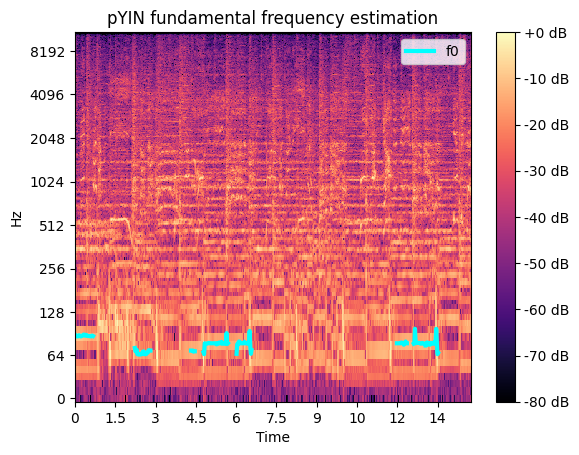

In [32]:
# USE THIS CODE

# Overlay F0 over a spectrogram

# run the short time fourier transform
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# setting up subplots
fig, ax = plt.subplots()

# generating the spectrogram
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)

# plotting
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

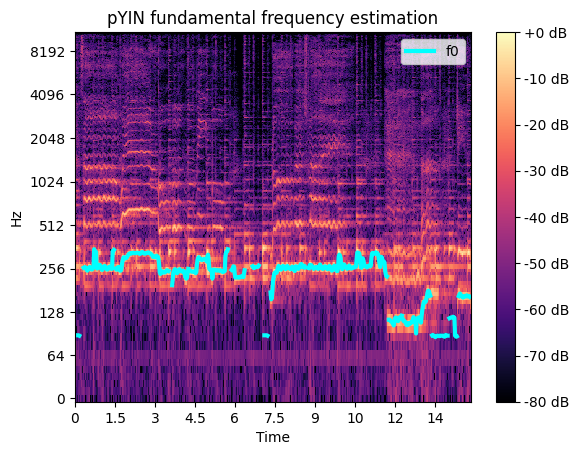

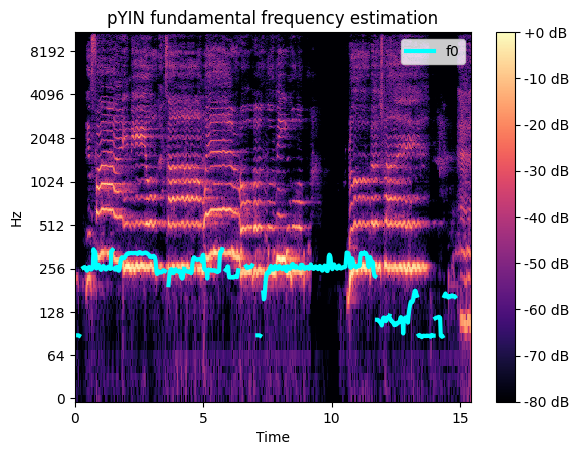

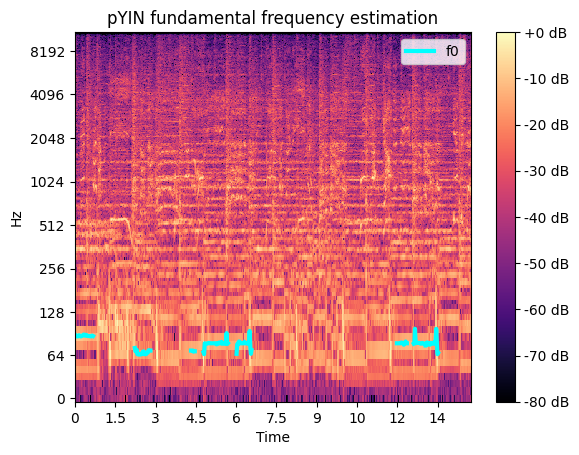

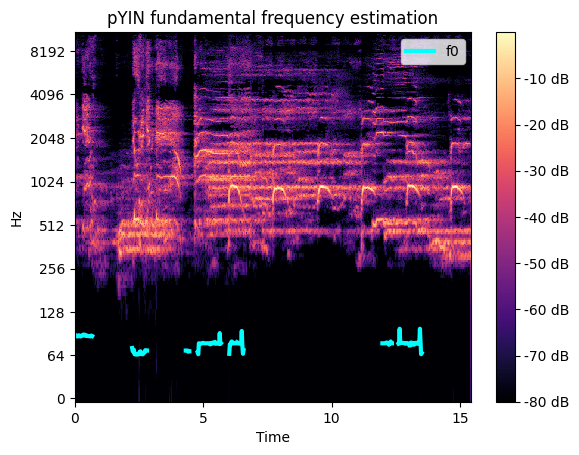

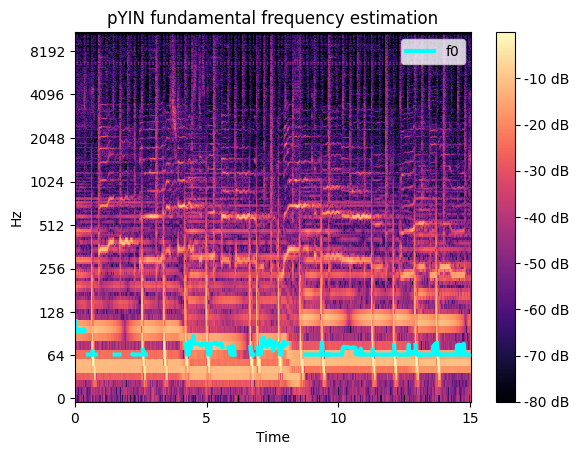

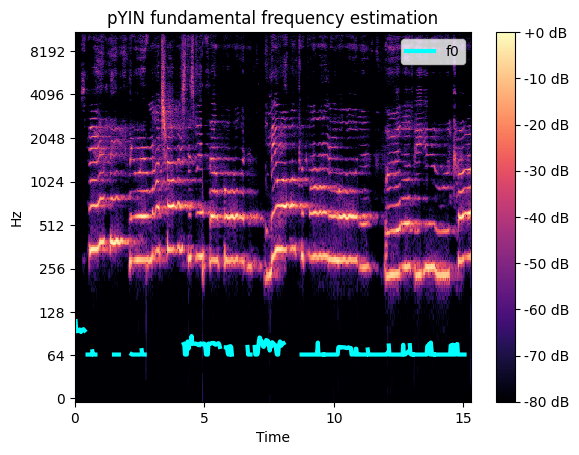

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

def analyzeAudio(audioPath):
  audioVals = {}
  y, sr = librosa.load(audioPath)
  audioVals['specCent'] =librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=2048, hop_length=512, freq=None)
  audioVals['specBand'] = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=2048, hop_length=512, freq=None)
  audioVals['specContrast'] = librosa.feature.spectral_contrast(y=y, sr=sr, n_fft=2048, hop_length=512, freq=None)
  audioVals['specFlatness'] = librosa.feature.spectral_flatness(y=y)

  audioVals['f0'], voiced_flag, audioVals['voiced_probs'] = librosa.pyin(y,
                                              fmin=librosa.note_to_hz('C2'),
                                              fmax=librosa.note_to_hz('C7'))
  audioVals['f0mean'] = np.nanmean(audioVals['f0'])



  return audioVals

def plotAudioVals(audioVals,audioPath,plotTitle,dataName):
  y, sr = librosa.load(audioPath)
  times = librosa.times_like(audioVals[dataName])
  D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
  fig, ax = plt.subplots()
  img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
  ax.set(title=plotTitle)
  fig.colorbar(img, ax=ax, format="%+2.f dB")
  ax.plot(times, audioVals[dataName], label=dataName, color='cyan', linewidth=3)
  ax.legend(loc='upper right')
  plt.show()

  return




audioPath = '/content/gawayneLessons/files/Israel IZ Kamakawiwoʻole - Somewhere over the Rainbow - TRIM.wav'
file1 = analyzeAudio(audioPath)
plotAudioVals(file1,audioPath,'pYIN fundamental frequency estimation','f0')

audioPath = '/content/gawayneLessons/files/Israel IZ Kamakawiwoʻole - Somewhere over the Rainbow - VOCALS - TRIM.wav'
file1b = analyzeAudio(audioPath)
plotAudioVals(file1,audioPath,'pYIN fundamental frequency estimation','f0')

audioPath = '/content/gawayneLessons/files/Michael - Jackson Earth Song - TRIM.wav'
file2 = analyzeAudio(audioPath)
plotAudioVals(file2,audioPath,'pYIN fundamental frequency estimation','f0')

audioPath = '/content/gawayneLessons/files/Michael - Jackson Earth Song - VOCALS - TRIM.wav'
file2b = analyzeAudio(audioPath)
plotAudioVals(file2,audioPath,'pYIN fundamental frequency estimation','f0')

audioPath = '/content/gawayneLessons/files/Zaini - Wherever you would call me - TRIM.wav'
file3 = analyzeAudio(audioPath)
plotAudioVals(file3,audioPath,'pYIN fundamental frequency estimation','f0')

audioPath = '/content/gawayneLessons/files/Zaini - Wherever you would call me - VOCALS - TRIM.wav'
file3b = analyzeAudio(audioPath)
plotAudioVals(file3,audioPath,'pYIN fundamental frequency estimation','f0')


In [34]:
audioPathList = ['/content/gawayneLessons/files/Israel IZ Kamakawiwoʻole - Somewhere over the Rainbow - TRIM.wav', '/content/gawayneLessons/files/Israel IZ Kamakawiwoʻole - Somewhere over the Rainbow - VOCALS - TRIM.wav',
'/content/gawayneLessons/files/Michael - Jackson Earth Song - TRIM.wav', '/content/gawayneLessons/files/Michael - Jackson Earth Song - VOCALS - TRIM.wav', '/content/gawayneLessons/files/Zaini - Wherever you would call me - TRIM.wav', '/content/gawayneLessons/files/Zaini - Wherever you would call me - VOCALS - TRIM.wav']

for file in audioPathList:
  analyzeAudio(file)

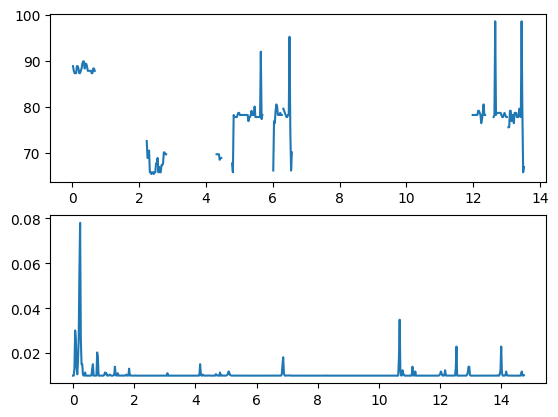

In [35]:
fig, ax = plt.subplots(2)
ax[0].plot(times, f0)
ax[1].plot(times, voiced_probs)

301.3175263677893


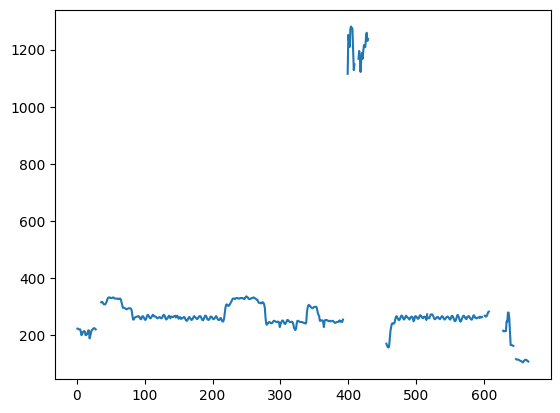

In [41]:
plt.plot(file1b['f0'])
print(file1b['f0mean'])

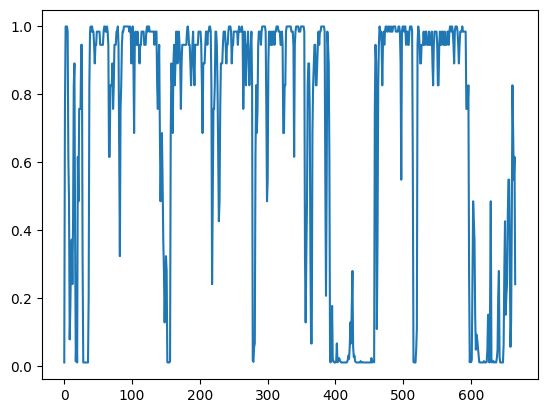

In [42]:
plt.plot(file1b['voiced_probs'])

270.0289877783147


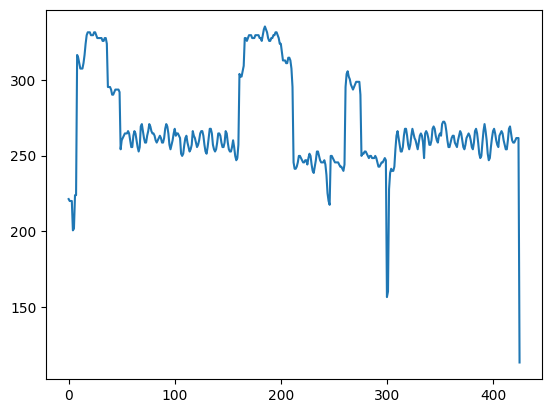

In [43]:
plt.plot(file1b['f0'][file1b['voiced_probs']>0.8])
print(np.mean(file1b['f0'][file1b['voiced_probs']>0.8]))

In [44]:
print(np.mean(file1b['f0'][file1b['voiced_probs']>0.8]))
print(np.mean(file2b['f0'][file2b['voiced_probs']>0.8]))
print(np.mean(file3b['f0'][file3b['voiced_probs']>0.8]))

270.0289877783147
760.8884119341195
303.8123022806458


For next week create a function that call spectral centroid, spectral bandwidth, spectral constrast, and spectral flatness


## spectral centroid
    audioVals['specCent']=librosa.feature.spectral_centroid(y=sig, sr=sr, n_fft=2048, hop_length=512, freq=None)
    
## spectral bandwidth
    audioVals['specBand']=librosa.feature.spectral_bandwidth(y=sig, sr=sr, n_fft=2048, hop_length=512, freq=None)
    
## spectral contrast
    audioVals['specContrast']=librosa.feature.spectral_contrast(y=sig, sr=sr, n_fft=2048, hop_length=512, freq=None)
    
## spectral flatness
    audioVals['specFlatness']=librosa.feature.spectral_flatness(y=sig)

The function will return the dictionary audioVals and you'll be able to plot or do calculations on the f0, specCent, specBand, specContrast, specFlatness elements

In [21]:
def getOnsetsEnv(sig,sr=44100):

    o_env = librosa.onset.onset_strength(sig, sr=sr)
    times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), hop_length=512, x_axis='time', y_axis='log')
    plt.title('Estimated from Onset Envelope')
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.plot(times, o_env, label='Onset strength')
    plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)

    return onset_frames

In [22]:
def getOnsetsWrapper(filename):
    sig , sr = librosa.load(filename,mono=True,sr=None)

    # estimate onsets from an onset envelope
    onset_frames = getOnsetsEnv(sig,sr)
    print('Estimated onsets:')
    print(librosa.frames_to_time(onset_frames, sr=sr))

In [23]:
def readOnsetCSV(audiofilename,csvfilename):

    df = pandas.read_csv(csvfilename,header=None)
    times=df.loc[:,0]

    sig , sr = librosa.load(audiofilename,mono=True,sr=None)
    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
    plt.title('Estimated from Sonic Visualiser')
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.vlines(times, 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)

    print('Estimated onsets:')
    print(times.tolist())


In [26]:
!pip3 install -r /content/gawayneLessons/files/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [27]:
pip install openunmix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.2 MB/s eta 0:00:00


In [50]:
def getOnsetsEnv(sig,sr=44100):

    o_env = librosa.onset.onset_strength(sig, sr=sr)
    times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), hop_length=512, x_axis='time', y_axis='log')
    plt.title('Estimated from Onset Envelope')
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.plot(times, o_env, label='Onset strength')
    plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)

    return onset_frames

In [51]:
def getOnsetsWrapper(filename):
    sig , sr = librosa.load(filename,mono=True,sr=None)

    # estimate onsets from an onset envelope
    onset_frames = getOnsetsEnv(sig,sr)
    print('Estimated onsets:')
    print(librosa.frames_to_time(onset_frames, sr=sr))


In [56]:
getOnsetsWrapper(file1)

TypeError: ignored

In [57]:
getOnsetsWrapper(file1b)

TypeError: ignored